In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("blackfriday.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [11]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [16]:
print("Missing values:\n", data.isnull().any(), "\n")

Missing values:
 User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool 



In [19]:
#fill nan with 0, meaning that they bought 0 item of those categories

data = data.fillna(0)
data_numeric = data[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]].groupby("User_ID").sum().reset_index().drop("User_ID", axis=1)
data_categoric = data.drop_duplicates("User_ID")[["User_ID", "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]].reset_index(drop=True)
data = pd.concat([data_categoric, data_numeric], axis=1)
data[["Product_Category_2", "Product_Category_3"]] = data[["Product_Category_2", "Product_Category_3"]].astype("int64")
print("\nNumber of customers on Black Friday: ", data.shape[0])


Number of customers on Black Friday:  5891


In [20]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,193,132,148,333481
1,1000002,M,55+,16,C,4+,0,334,539,359,810353
2,1000003,M,26-35,15,A,3,0,93,117,148,341635
3,1000004,M,46-50,7,B,2,1,13,102,127,205987
4,1000005,M,26-35,20,A,1,1,659,642,207,821001


In [22]:
## Exlporing the data for insights
# 1. Gender and age

data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct ="%1.1f%%", shadow=True)

<Axes: title={'center': 'Gender'}, ylabel='count'>

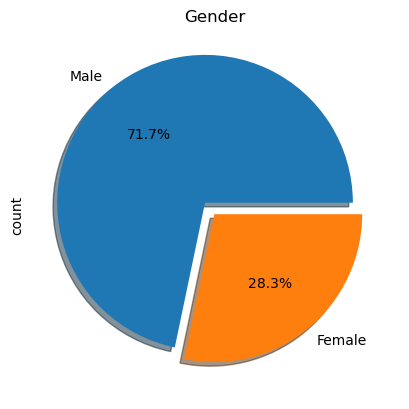

In [23]:
plt.show()

In [25]:
data.groupby("Age")["Purchase"].sum().plot.bar(title="Age&Purchase")
plt.xticks(rotation=45)
sns.despine()

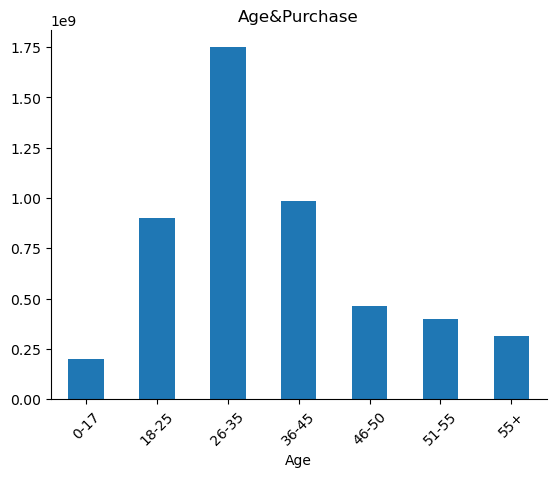

In [26]:
plt.show()

In [27]:
sns.countplot(data, x = "Age", hue="Gender").set_title("Age&Gender")
sns.despine()

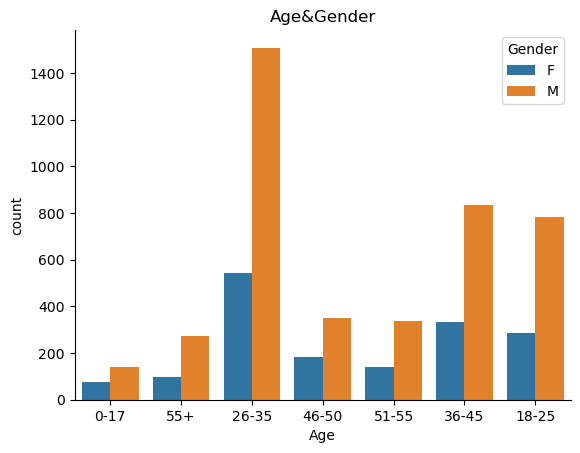

In [28]:
plt.show()

In [29]:
data.groupby("Gender")["Purchase"].mean()

Gender
F    876008.343938
M    842186.621775
Name: Purchase, dtype: float64

In [34]:
x = data.groupby("Gender")["Purchase"].mean().index
y = data.groupby("Gender")["Purchase"].mean().values
plt.plot(x, y, "ro")
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")
sns.despine()

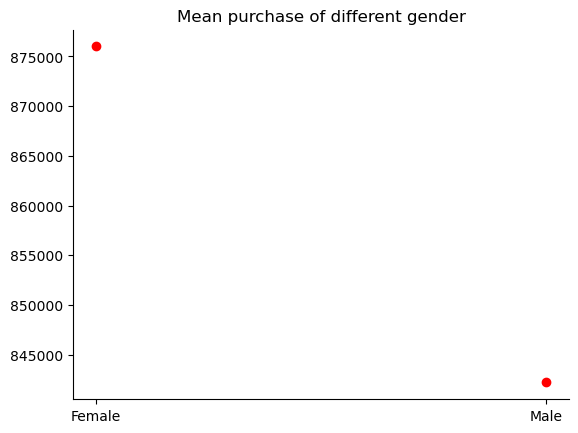

In [35]:
plt.show()

In [36]:
#2. City
data.groupby("City_Category")["User_ID"].count().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)


<Axes: title={'center': 'City_Category'}, ylabel='User_ID'>

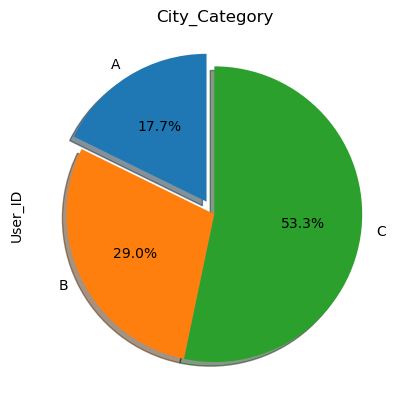

In [37]:
plt.show()

In [41]:
data.groupby("City_Category")["Purchase"].sum().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)

<Axes: title={'center': 'City_Category'}, ylabel='Purchase'>

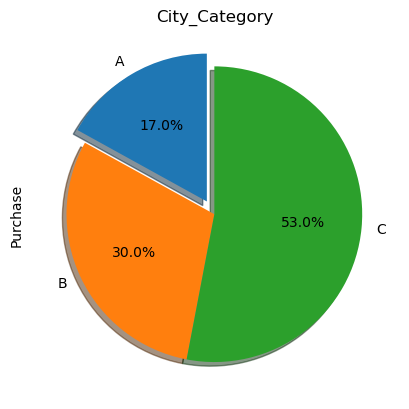

In [42]:
plt.show()

In [43]:
x = data.groupby("City_Category")["Purchase"].mean().index
y = data.groupby("City_Category")["Purchase"].mean().values
plt.plot(x, y, "ro")
plt.title("Mean purchase of different city categories")
sns.despine()

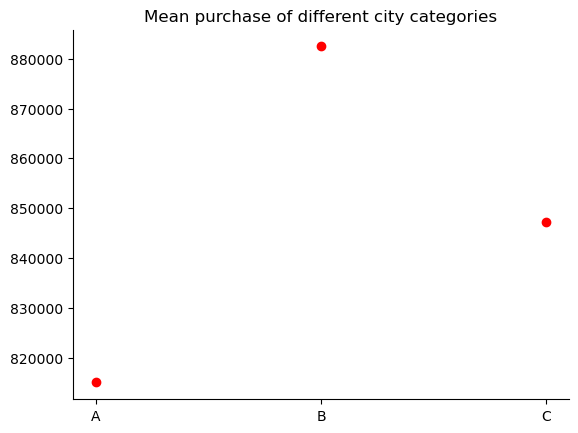

In [44]:
plt.show()

In [45]:
# 3. Occupation
data["Occupation"].value_counts().sort_values().plot.bar(title="Occupation", color="c", figsize=(12, 8))
sns.despine()

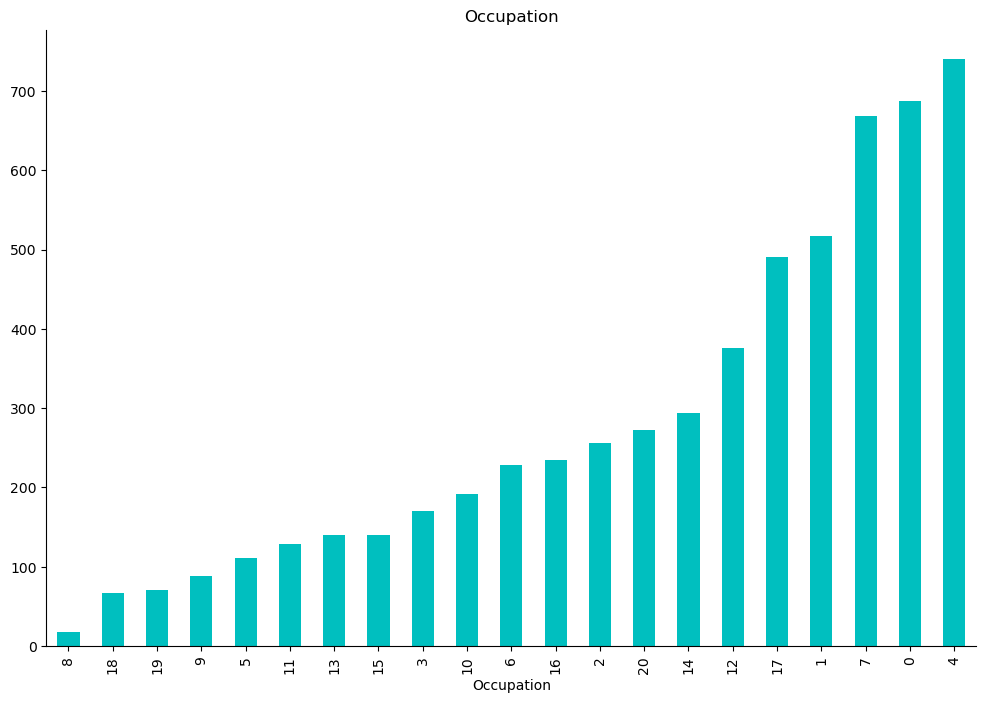

In [46]:
plt.show()

In [47]:
pd.DataFrame(data.groupby("Occupation")["Purchase"].mean()).sort_values(by="Purchase").plot.bar(title="Mean purchase of different occupation", figsize=(12, 8))
sns.despine()

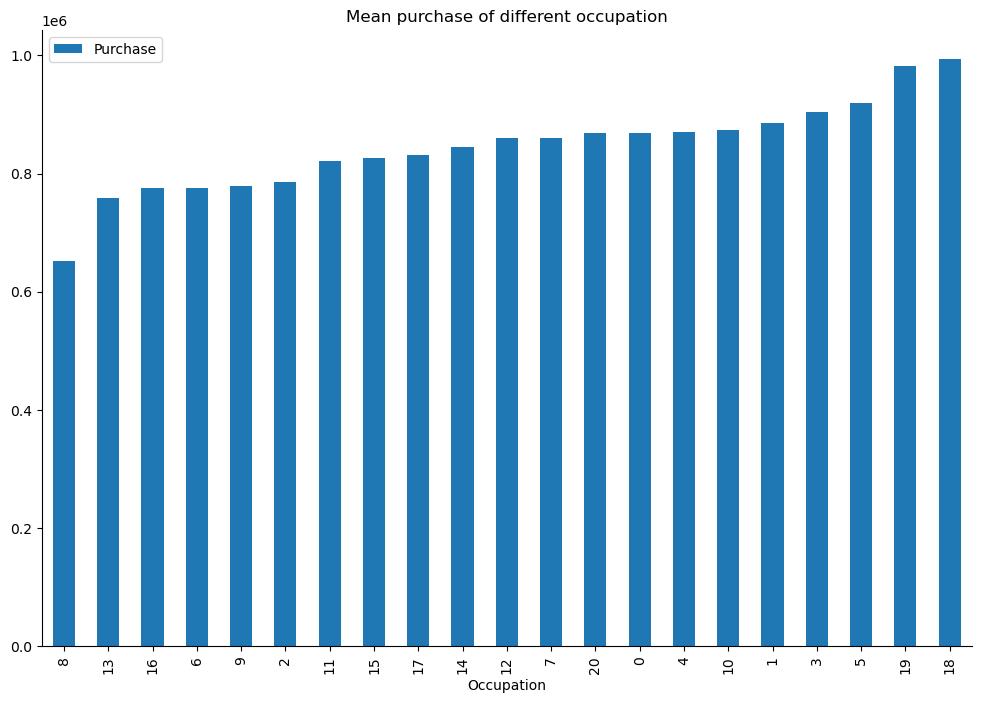

In [48]:
plt.show()

In [49]:
# 4. Residence Stability
data["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city", explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)


<Axes: title={'center': 'Years of staying in the city'}, ylabel='count'>

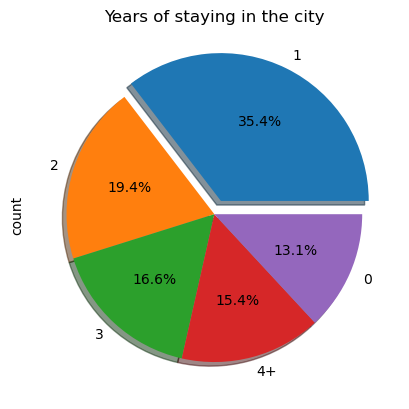

In [50]:
plt.show()

In [51]:
pd.DataFrame(data.groupby("Stay_In_Current_City_Years")["Purchase"].mean()).sort_values(by="Purchase").plot.bar(title="Mean purchase of different stability", color="orange")
sns.despine()

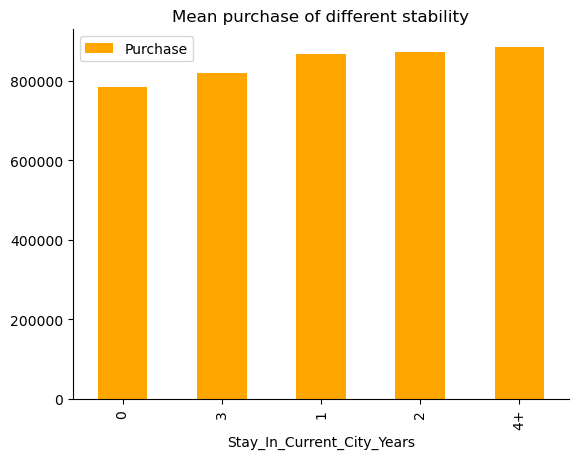

In [52]:
plt.show()

In [53]:
# 5. Product

data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="grey")
sns.despine()

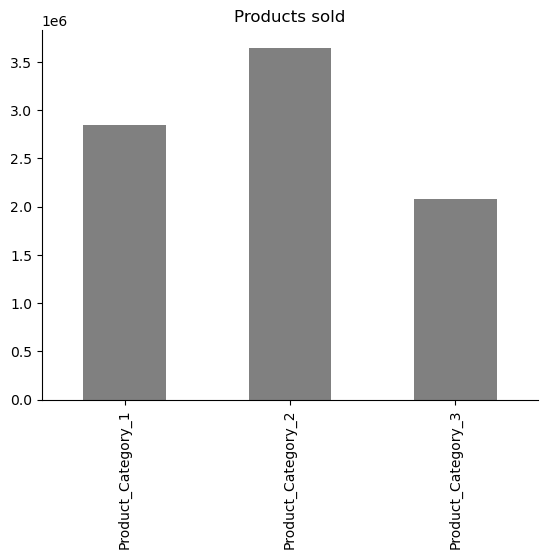

In [54]:
plt.show()

In [55]:
data.groupby(["City_Category"])[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].mean().plot.line(title="")
sns.despine()

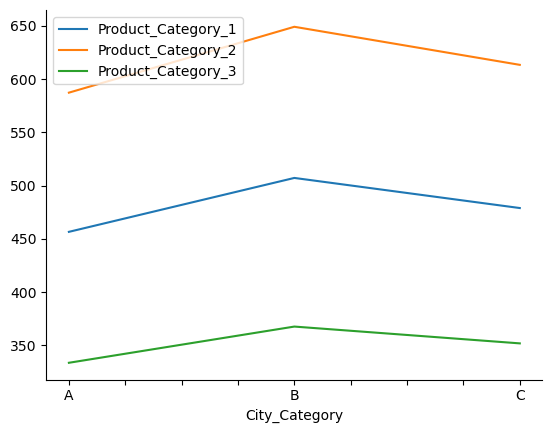

In [56]:
plt.show()

In [57]:
data.groupby(["City_Category"])[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].mean().plot.bar(title="")
sns.despine()

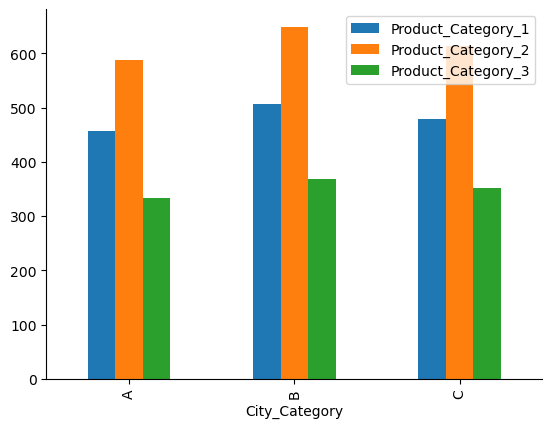

In [58]:
plt.show()

In [59]:
## Predict future sales(purchase)

#label encoding: categorical to numeric

le = preprocessing.LabelEncoder()
cat_col = data.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    data.loc[:, i] = le.fit_transform(data.loc[:, i])

In [60]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

Text(0.5, 1.0, 'Correlation between features')

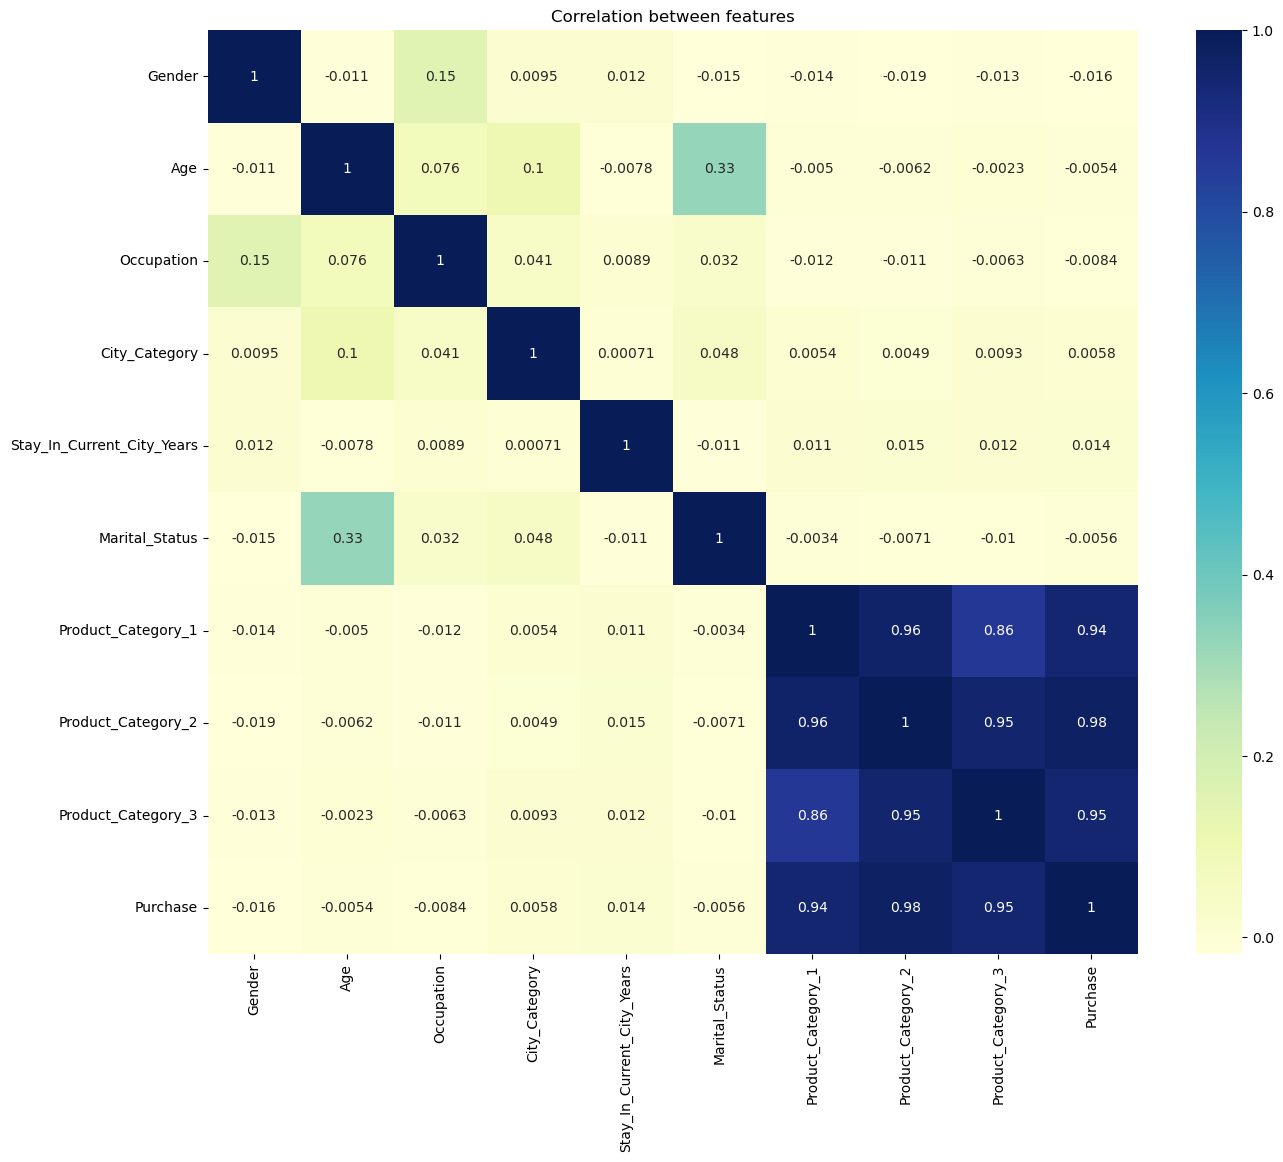

In [61]:
plt.show()

In [62]:
predictor = data.drop("Purchase", axis=1)
target = data["Purchase"]

In [65]:
# Find the best parameter for model making

param_grid = {"n_estimators":[1, 5, 10, 50, 100, 150, 300, 500], "max_depth":[1, 3, 5, 7, 9]}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1).fit(predictor, target)

print("Best parameter: {}".format(grid_rf.best_params_))
print("Best score: {:.2f}".format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 9, 'n_estimators': 50}
Best score: 192910.68


In [67]:
# make model with best parameters

model = RandomForestRegressor(n_estimators=50, max_depth=9, random_state=1, verbose=1)


In [68]:
#predict with cross validation

scores = cross_val_score(model, predictor, target, scoring="explained_variance", cv=5)
print(scores)
print("Model effectiveness: %f" % (scores.mean()))

scores

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[0.95225385 0.95902164 0.95749733 0.95174155 0.95722588]
Model effectiveness: 0.955548


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array([0.95225385, 0.95902164, 0.95749733, 0.95174155, 0.95722588])